# Design of Experiments 🥼🧫
## Bacterial growth media recipes
[Lysogeny broth](https://en.wikipedia.org/wiki/Lysogeny_broth) is a standard soup of nutrients to feed to *E. coli* in the lab. The question is: **is it optimal?**

Here is the recipe for a 1L batch:
- 10 g tryptone (mix of peptides)
- 5 g yeast extract
- 10 g NaCl
- distilled water up to 1L

## Is it optimal?
In these sessions we'll compare different broth recipes for bacterial growth. We'll make and analyze some **real data** and then look into some ways to design experiments that investigate multiple factors at once. To investigate the effect of broths on growth rates, we'll measure growth rates over a 12 hour period via the absorbance of light @ 600 nm (OD 600) and use the data to fit growth curves & extract growth rate constants, which will be our end points.

## Experiment
We'll measure how fast *E. coli* grow in different media. Our experiment will measure the *optical density* (cloudiness, OD) of the cells as they grow in media over the course of 12 hours, which should indicate their population growth. We can quantify growth rate by fitting the [Gomperz equation](https://en.wikipedia.org/wiki/Gompertz_function) for growth to our data, which will give us a parameter for *growth rate*. Gomperz equations are usually variants of:
 $$f(t)=ae^{-be^{-ct}}$$ 
Where:
- $t$ is time
- $a$ is the maximum population (asymptote limit)
- $b$ is the lag - displacement along x-axis
- $c$ is the growth rate 👀

Which can describe a variety of sigmoidal (s-shaped) curves. For more on the Gomperz growth equations in biology, check out [this reveiw](https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0178691&type=printable) and [Steve's tutorial](https://github.com/UoMMIB/Python-Club/blob/master/Tutorials/Growth-Curve/growthCurve.ipynb), where not only do we fit the curve to some real bacterial growth data, but we also use bootstrapping to get uncertainty estimates for our model.

# Optimization
We'll calculate $c$ for all of our experiments, and then start testing different recipes that optimize $c$. We'll look at ways of desgning multi-factor experiments efficiently in python and do 'em!

## The Plan
- **Session 1:** I've collected some data in an initial experiment, growing the bacteria in LB. This will be an intial baseline experiment & allow us to build some functions that automate our data analysis.
- **Session 2:** We'll design a round of experiments that screen different factors, I'll carry out the experiments the following week.
- **Session 3:** We'll analyze the data from our screening experiments, fit a simple model & draw what conclusions we can
- **Session 4:** We'll design a last round of experiments to attempt to find the true optimal broth recipe for our end point

# Session 1 - Pilot
## aim
The aim of this session is:
- Establish an experimental procedure & identify practical issues early
- Create functions that will **automate analysis for future experiments**

## Plate assay
I was in the lab anyway this week so I set up an experiment that measures bacterial growth. We'll use this setup as a template for the future experiments. It runs in a 96-well plate which is good for running several experiments at once. 

### protocol
#### Materials
- **96 well plate:** sterile, optically clear, with a clear lid
- **Growth media:** sterile
- **Cells:** DH5a *E. coli* 

#### steps
- **day culture:** I seed some LB media with cells, and let it grow @ 37°C for 4-6 h
- **plate setup:** with sterile conditions: dispense 200 µl of media (control) or media seeded with cells (test) into wells
- **measurement:** incubate plate (lid on) in plate reader @ 37°C with shaking @ ????? , read absorbance at 600 nm (matrix scan) every 15 minutes for 12 hours

#### data
The plate data is exported as a ```.csv``` file which has a few lines at the start of the file that contains information about the machine and the experiment, followed by a table that will need to be tinkered with to make easier to work with.

# 🐼 data cleaning - exercise 1.1 🐼
## Task:
Write a reusable function that will reliably:
- drop the first section of of the file which contains information about the experiment - try slicing them out using ```.loc``` or ```.iloc```
- set well numbers as index (e.g. A01, A02, ...) using ```DataFrame.index = <new-index>```
- drop columns containing ```NaN``` & ```Time``` using ```DataFrame.drop([columns,...], axis = 1)```
- set times as header using ```DataFrame.columns = <new-column-headers>```

In [1]:
import pandas as pd
import numpy as np

def clean_data(path):
    # return a 'clean' dataframe
    pass # delete this
    
    
    
    
clean_data('20200903-LB-Ecoli-growth.csv')

In [2]:
import DesignOfExpAnswers

df = DesignOfExpAnswers.clean_data('20200903-LB-Ecoli-growth.csv')
df.head()

6,0 h,0 h 15 min,0 h 30 min,0 h 45 min,1 h,1 h 15 min,1 h 30 min,1 h 45 min,2 h,2 h 15 min,...,9 h 30 min,9 h 45 min,10 h,10 h 15 min,10 h 30 min,10 h 45 min,11 h,11 h 15 min,11 h 30 min,11 h 45 min
nan,,,,,,,,,,,,,,,,,,,,,
A01,1.135,1.130,1.110,1.127,1.147,1.129,1.121,1.121,1.141,1.136,...,0.856,0.817,0.823,0.806,0.802,0.763,0.756,0.639,0.724,0.727
A02,0.916,0.898,0.878,0.869,0.831,0.823,0.815,0.831,0.864,0.891,...,1.707,1.718,1.728,1.741,1.760,1.771,1.783,1.751,1.781,1.780
A03,1.125,1.046,1.032,1.064,1.024,1.044,1.008,0.984,1.026,0.991,...,0.761,0.759,0.754,0.720,0.714,0.709,0.704,0.560,0.681,0.690
A04,0.923,0.872,0.855,0.854,0.816,0.815,0.811,0.832,0.862,0.890,...,1.739,1.737,1.761,1.769,1.782,1.785,1.805,1.795,1.813,1.802
A05,1.177,1.080,1.056,1.082,1.041,1.071,1.028,1.029,1.052,1.017,...,0.809,0.803,0.804,0.784,0.781,0.753,0.767,0.650,0.749,0.754


# 🔎 ```regex``` time 🔎
## Problem:
The column headers are in the format: ```['0 h ', '0 h 15 min', '0 h 30 min', ... ]``` and we want them to be numerical
## Exercise 1.2 - strings -> numbers
We've used the ```regex``` (regular expressions) module ```re``` before in our [UV-Vis data analysis tutorial](https://github.com/UoMMIB/Python-Club/blob/master/Tutorials/uv-vis-data.ipynb). In particular, we looked at the function ```re.findall(<search-pattern>, <string>)``` to return a list of all occurances of the search term. We also learned that the regex pattern ```\d``` will match numerical characters and the term ```\d+``` will match strings with one or more numerical characters.

## Aim:
Your job is to write another reusable function that:
- Extracts the hours and minutes from the column headers
- transforms the strings of the numbers into integers
- calculates the total number of minutes from the extracted hours/mins 
- returns the timestamps in terms of minutes

In [3]:
import re

def process_time_headers(headers):
    # re.findall ??
    # different length lists?
    # strings -> integers
    # hours -> minutes
    pass

process_time_headers(df.columns)

In [4]:
# answers
df.columns = DesignOfExpAnswers.process_time_headers(df.columns)
df.head()

,0,15,30,45,60,75,90,105,120,135,...,570,585,600,615,630,645,660,675,690,705
nan,,,,,,,,,,,,,,,,,,,,,
A01,1.135,1.130,1.110,1.127,1.147,1.129,1.121,1.121,1.141,1.136,...,0.856,0.817,0.823,0.806,0.802,0.763,0.756,0.639,0.724,0.727
A02,0.916,0.898,0.878,0.869,0.831,0.823,0.815,0.831,0.864,0.891,...,1.707,1.718,1.728,1.741,1.760,1.771,1.783,1.751,1.781,1.780
A03,1.125,1.046,1.032,1.064,1.024,1.044,1.008,0.984,1.026,0.991,...,0.761,0.759,0.754,0.720,0.714,0.709,0.704,0.560,0.681,0.690
A04,0.923,0.872,0.855,0.854,0.816,0.815,0.811,0.832,0.862,0.890,...,1.739,1.737,1.761,1.769,1.782,1.785,1.805,1.795,1.813,1.802
A05,1.177,1.080,1.056,1.082,1.041,1.071,1.028,1.029,1.052,1.017,...,0.809,0.803,0.804,0.784,0.781,0.753,0.767,0.650,0.749,0.754


# 📈 Plotting  📈
Let's have a quick look at our data
## 🚧  ```dtype```  problem 🚧
run:
```python
plt.plot(df.loc['A01',:])
plt.show()
```
That's not right is it? It happened because the contents of each cell is saved as as ```string``` instead of something numerical. A quick way to change the ```dtype``` of a ```pandas``` object is to run ```DataFrame.astype(<dtype>)```.

In [5]:
# try to plot here

In [6]:
df = df.astype(float) # this will have to go into our analysis function for next time

# 📈 Plotting  📈 again
## First row of the plate
Every odd column contains cells and every even colummn is just media.
## Exercise 1.3
Make a reusable function that will:
- set a wide canvas to plot on with ```plt.figure(figsize=(x,y))```
- Plot the entire```df``` with a loop and ```plt.plot(<row>)```
- label axes with ```plt.xlabel(<label>)```
- Show a legend with ```plt.legend()```

In [7]:
import matplotlib.pyplot as plt 

def quick_plot(data):
    pass 
    
quick_plot(df.iloc[0:24,:]) # test on a few rows

# 🧮 Baselines 🧮
## Problem: Different starting OD's
When we look at the data, we can see that the wells with cells start at a relatively high OD. For the sake of our downstream analysis, we want to see the change in OD relative to the starting OD.
## Exercise 1.4 - baselines!
- For each trace in ```df``` subtract the starting OD at time 0 from the entire trace
- Try using ```DataFrame.subtract(<value-or-series>, axis=<0/1>)```
- plot again

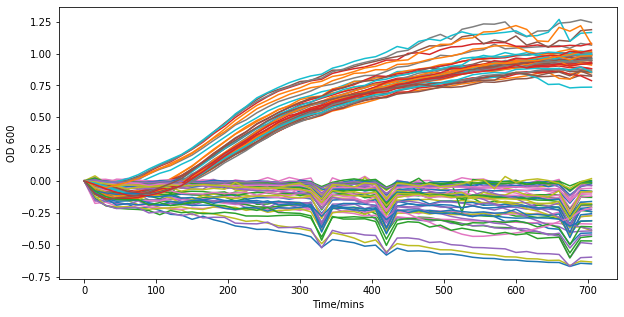

In [8]:
DesignOfExpAnswers.quick_plot(df.subtract(df[0], axis=0))

# Next time
* Calculating growth rate 🧮
* Designing Experiments for the first round of media optimization

# Session 2
## aim
* Calculate growth rate for each experiment
* Identify issues in experimental procedure
* Design Next experiment 
## Learning outcomes
* ```scipy.optimize.curve_fit``` - upper and lower bounds
* ```matplotlib.pyplot.subplots``` - grids of plots
* ```dexpy``` - Design of experiments

## Growth rate
The variant of the Gomperz equation we'll use today is:
$$W(t)=W_{m}e^{-e^{-k(t-T_{m})}}$$
which is discussed in [this reveiw](https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0178691&type=printable) & in [Steve's tutorial](https://github.com/UoMMIB/Python-Club/blob/master/Tutorials/Growth-Curve/growthCurve.ipynb). Breakdown of variables:
* $W_t$ - growth metric @ time $t$ - in our case $OD_{600}$
* $W_m$ - max size/$OD_{600}$ - the upper asymptote
* $k$ - **growth rate coefficient** - 🦠🦠
* $t$ - time of measurement
* $T_m$ - time at inflection - where the curve changes direction & growth slows

## Exercise 2.1
**Write a function for** $W(t)=W_{m}e^{-e^{-k(t-T_{m})}}$
#### clues 🔍
* $e^x$ = ```np.exp(x)```

In [9]:
def gomperz(wm,tm,k,t):
    pass # delet dis

# Gomperz with some random parameters
Are they ```subplots```? 👀

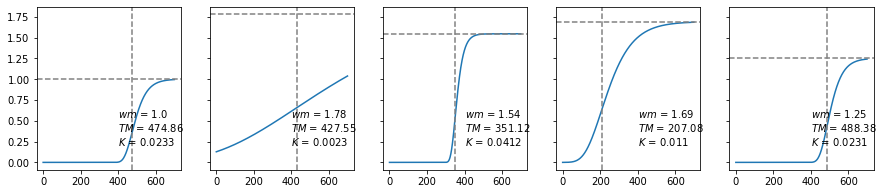

In [10]:
import random

fig, ax = plt.subplots(1,5, figsize = (15,3), sharey=True)
times = range(0,700) # 700 mins
for i in ax:
    wm,tm,k = random.uniform(1,2),random.uniform(100,500),random.uniform(0.001,0.05)
    wt = [DesignOfExpAnswers.gomperz_ans(wm,tm,k, j) for j in times]
    i.plot(times,wt)
    i.text(400,0.2,f'$wm$ = {round(wm,2)}\n$TM$ = {round(tm,2)}\n$K$ = {round(k,4)}')
    i.axhline(wm, linestyle='--', color='gray')
    i.axvline(tm,linestyle='--',color='gray')
plt.show()

# subplots side note

Subplots are a handy feature of ```matplotlib.pyplot``` - they allow for a grid of figures, which lends itself to tasks like ours where we have many experiments to plot and examine at once. Subplots are explained in detail in [**Python Data Science Handbook - Jake Vanderplas (free ebook)**](https://jakevdp.github.io/PythonDataScienceHandbook/index.html) - Chapter [**04.08**](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html). There are several ways to make subplots, today I'll show you one.

## ```plt.subplots``` 
A standard syntax for creating goes like this:
```python
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, ...  figsize=(x,y))
```
Where ```fig``` is a ```matplotlib.figure.Figure``` object - a high level element that we won't worry about today; & ```ax```: a ```numpy``` array containing instances of ```matplotlib.axes._base._AxesBase``` - we'll be interacting with these.

### ```matplotlib.axes._base._AxesBase``` - ```ax[0]```
each subplot element in ```ax``` is a tile in the grid. We can plot whatever we want on these tiles, but the commands differ slightly from the ```plt.plot``` that we're used to. In this case we'll call something like ```ax[0].plot(...)``` for each element in ax either individually or as part of a loop. All of the same plots are available to us as methods of each element of ```ax```. One difference to be aware of is the aesthetic changes like titles and axis names. These are normaly preceeded by ```set_``` e.g. ```ax[0].set_title(...)```.
Here's a quick cheat sheet:

# cheat sheet

# exercise 2.2 - make a ```subplot```
I've started making a figure below that has 2 subplots. You can see that I sliced the 1-D ```numpy``` array that conatains references to the subplot objects. If I had specified a 2D grid of plots then I'd have to slice it 2D style.  I've plotted $y = x^2$ on the first subplot.

Your task is to plot $y = e^x$ on the second subplot, and add a title, and label the axes $x$ and $y$. 

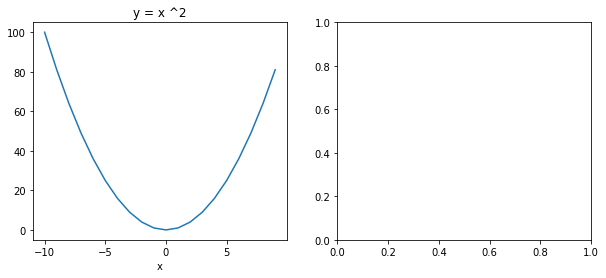

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
x_axis = range(-10,10)
ax[0].plot(x_axis, [i**2 for i in x_axis])
ax[0].set_title('y = x ^2')
ax[0].set_xlabel('x')
plt.show()

# 🐼 ✄

In [12]:
x = df.subtract(df[0], axis=0) # subtract baseline
x = x.iloc[1::2,:] # every other row - only wells with cells
x.head()

,0,15,30,45,60,75,90,105,120,135,...,570,585,600,615,630,645,660,675,690,705
nan,,,,,,,,,,,,,,,,,,,,,
A02,0.0,-0.018,-0.038,-0.047,-0.085,-0.093,-0.101,-0.085,-0.052,-0.025,...,0.791,0.802,0.812,0.825,0.844,0.855,0.867,0.835,0.865,0.864
A04,0.0,-0.051,-0.068,-0.069,-0.107,-0.108,-0.112,-0.091,-0.061,-0.033,...,0.816,0.814,0.838,0.846,0.859,0.862,0.882,0.872,0.890,0.879
A06,0.0,-0.053,-0.076,-0.085,-0.114,-0.122,-0.111,-0.097,-0.065,-0.037,...,0.774,0.785,0.800,0.803,0.818,0.820,0.827,0.801,0.830,0.822
A08,0.0,-0.036,-0.024,-0.027,-0.006,0.010,0.055,0.091,0.120,0.161,...,1.073,1.037,1.043,1.047,1.052,1.056,1.062,1.041,1.079,1.066
A10,0.0,-0.093,-0.106,-0.115,-0.112,-0.108,-0.077,-0.053,-0.012,0.034,...,0.813,0.826,0.851,0.834,0.808,0.757,0.760,0.730,0.735,0.736


# section 2.3 - curve fitting
We've covered curve fitting before, except this time we'll see an example of it going wrong, and discuss solutions! We'll look at using bounds for our parameters too.

```python
curve_fit(f, xdata, ydata, ... bounds=(-inf, inf))
```

Here's an example that illustrates why bounding parameters is sometimes necessary:

In [13]:
from scipy.optimize import curve_fit

parameters, covariance_matrix = curve_fit(DesignOfExpAnswers.gomperz_ans, x.loc['A02',:], x.columns)
wm,tm,k = parameters
print('wm = ',wm)
print('tm = ',tm)
print('k = ',k)

print('They should all be positive!')

wm =  -110.25542613572435
tm =  1.0
k =  112.25574321088511
They should all be positive!


/home/james/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


I had trouble getting the curves to fit the data here, so I'll just run through all of them without an exercise. I think that a problem is the initial dip in $OD_{600}$ at the start of the experiment that might have thrown off the curve fitting. I'm not sure why this might have happened though 🤔

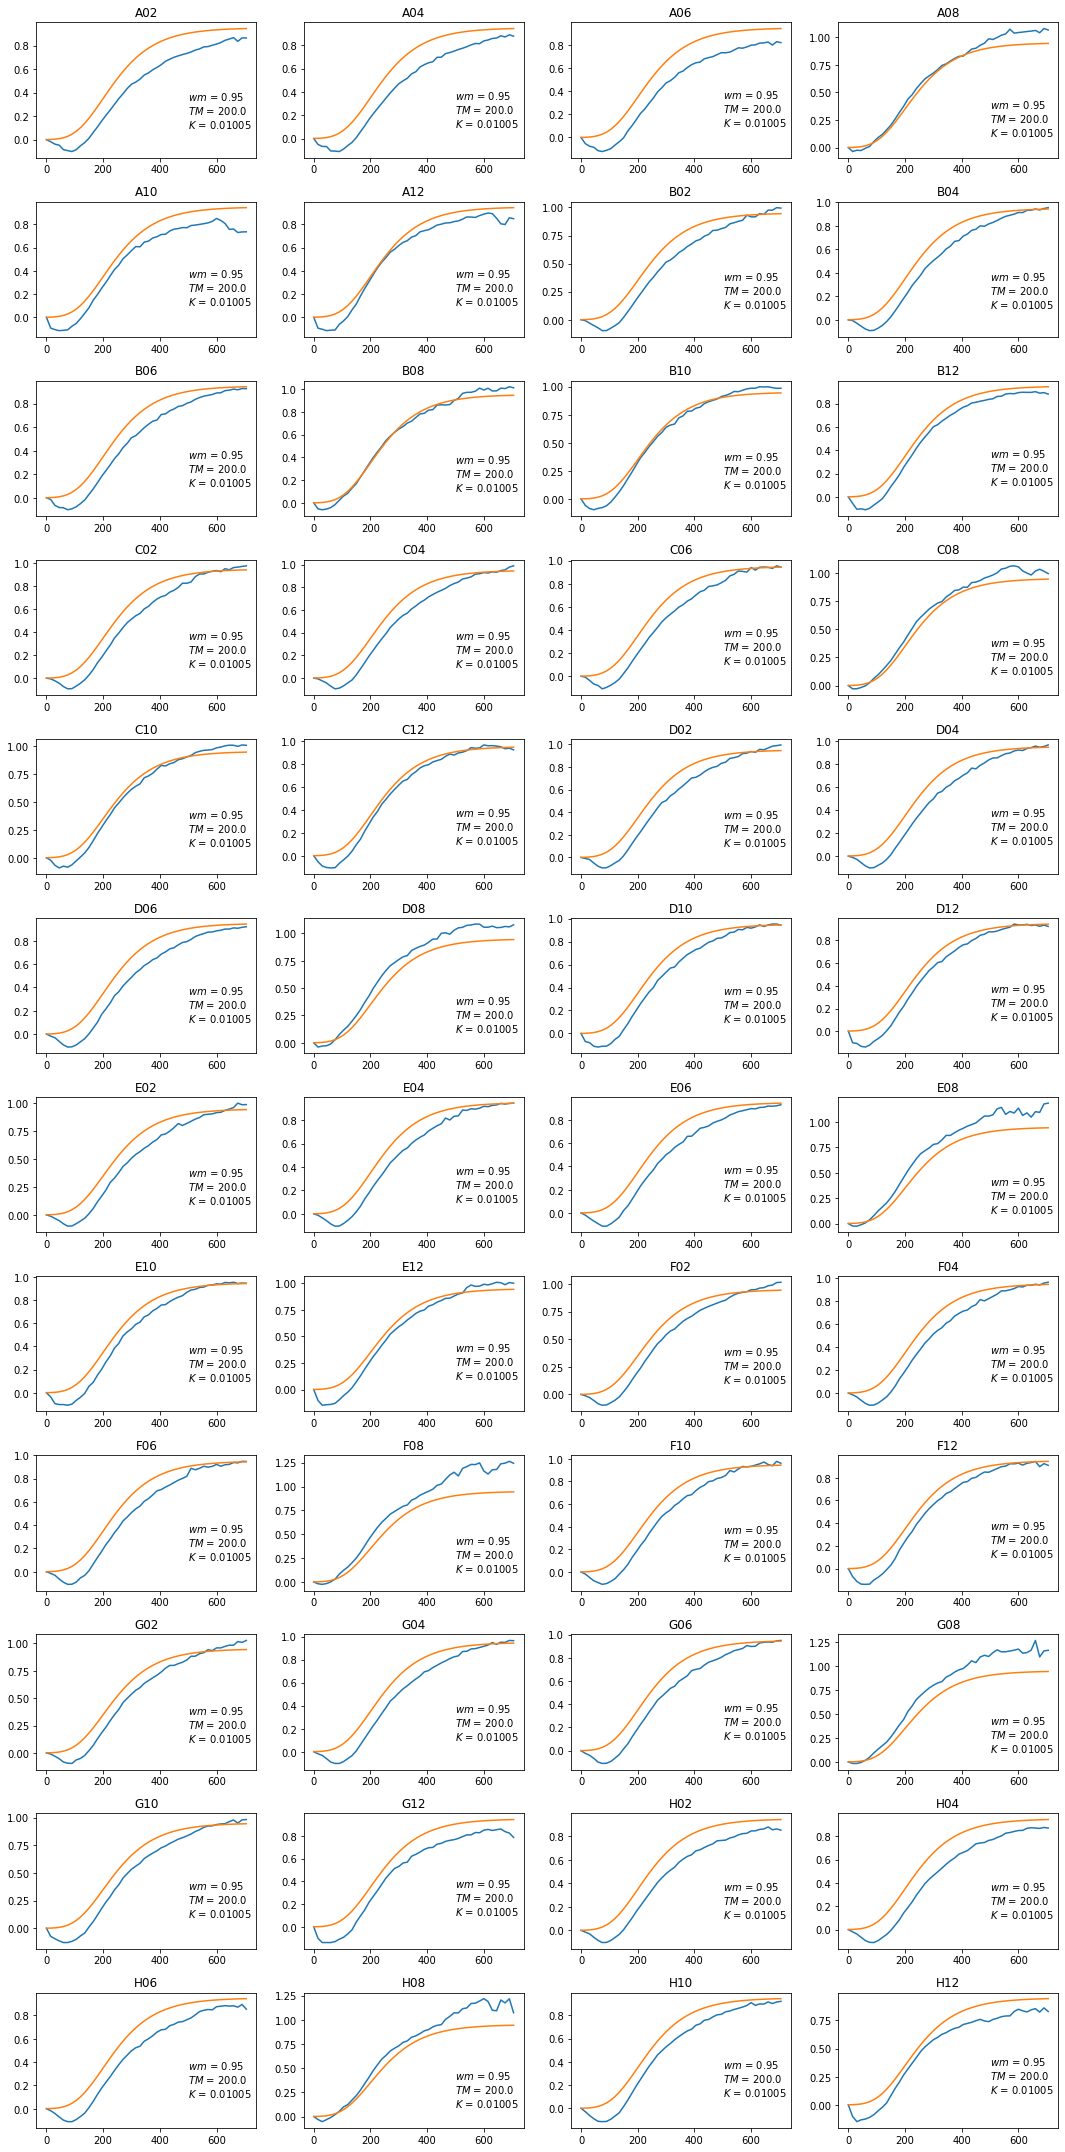

In [14]:
bounds = ((0.6,100,0.0001),(1.3, 300,0.02)) #wm,tm,k,t
parameters, covariance_matrix = curve_fit(DesignOfExpAnswers.gomperz_ans, 
                                          x.loc['A02',:], 
                                          x.columns, 
                                          bounds=bounds)
wm,tm,k = parameters


fig,ax = plt.subplots(12,4, figsize = (15,30))
for row,subplot in zip(x.index, ax.flatten()):
    parameters, covariance_matrix = curve_fit(DesignOfExpAnswers.gomperz_ans, 
                                              x.loc[row,:], 
                                              x.columns, 
                                              bounds=bounds)
    wm,tm,k = parameters
    
    subplot.plot(x.columns, x.loc[row,:])
    subplot.plot(x.columns, DesignOfExpAnswers.gomperz_ans(wm,tm,k,x.columns))
    subplot.set_title(row)
    subplot.text(500,0.1,f'$wm$ = {round(wm,2)}\n$TM$ = {round(tm,2)}\n$K$ = {round(k,6)}')

plt.tight_layout()
plt.show()

Let's skip over this and hope that the data makes sense next time 🤫

# 2.3 [Design of experiments](https://en.wikipedia.org/wiki/Design_of_experiments)

What a boring name! In breif, Design of Experiments (DoE) is a method for optimal experiment design. Optimal in this case meaning most informative - especially for a model. With a good model, we can then quite easily find the optimal set of conditions for our system.

This method is especially important in systems with multiple interacting parameters. In our case, the parameters will be ingredients in our nutrient broths. We're expecting interaction between our parameters, so we'll eventually be wanting to test them in combination, whilst also minimizing the number of experiments.

In the interest of minimizing the number of experiments, we'll compromise and **screen** some parameters - test them in experiments that don't necessarily look for interactions, but can help us rule out some options for our next round. 

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmedia.americanpharmaceuticalreview.com%2Fm%2F28%2Farticle%2F348755-fig1.jpg&f=1&nofb=1)

As well as ignoring interactions between our features, we'll design our experiments with a **linear model** in mind which will help us minimize the number of experiments.

# our factors
We'll have to choose some readily avaiable media ingredients to screen. I picked out a couple of standard media recipes from [**openwetware**](https://openwetware.org/wiki/Category:Standard_Media) for components with the sorts of w/v rations the use:
* tryptone 2% w/v
* yeast extract 0.5 % w/v
* glycerol 0.4 % v/v
* NaCl 10 mM
* glucose 10 mM


# ```dexpy``` - design of experiments in python
```dexpy``` is a python module for DoE. 
* [**documentation**](https://statease.github.io/dexpy/index.html)
* [**source code**](https://github.com/statease/dexpy)

In this section we'll design an experiment with ```dexpy``` and maybe look under the hood.

```dexpy``` can be installed with ```pip``` like this:
```pip install dexpy```
Easy peasy

## designing the experiment
The [**documentation**](https://statease.github.io/dexpy/index.html) points us to ```dexpy.factorial.build_full_factorial``` for a simple full factorial design. A full factorial design is every combination of highs and lows of each factor. For our 5 factors at 2 levels each, that's $2^5$ = 32 medias. Without automated liquid handling, that's a pain in the ass.

We can cheat, & use a [**fractional factorial design**](https://en.wikipedia.org/wiki/Fractional_factorial_design) - which aims to gain the same information with fewer runs. 🧞 How does this witchcraft work?🧞 It's a compromise based on the assumption of [sparsity of effects](https://en.wikipedia.org/wiki/Sparsity-of-effects_principle) - the main effects in our system are probably one and two factor interaction effects. 

How to you formulate that? 
$$n_{experiments} = n_{levels}^{n_{factors} - p}$$ 

where $p$ is the number of interaction effects that will be obscured by our minimal design. In our case $n levels = 2$ and $n factors = 5$ and $p = 2$ - 2 of the factors will be heaped together & difficult to delineate. So the number of experiments we need to do is $$2^{5-2} = 8$$

We'll look more at which factors are confounded next time.

In [15]:
from dexpy import factorial

# fractional factorial
# full factorial = factorial.build_full_factorial(factor_countbb)
exp_d = factorial.build_factorial(factor_count = 5, run_count = 8)
exp_d

,X1,X2,X3,X4,X5
0,-1,-1,-1,1,1
1,-1,-1,1,1,-1
2,-1,1,-1,-1,1
3,-1,1,1,-1,-1
4,1,-1,-1,-1,-1
5,1,-1,1,-1,1
6,1,1,-1,1,-1
7,1,1,1,1,1


# exercise 2.3 
## problem
Our design template has High and low levels of each factor, ignoring what those factors might be.
To make this usable, we'll need to replace the column headers with each of our factor names & the ```1```'s & ```-1```'s with the high and low levels of each factor

I've made a dictionary of the highs and lows of each of the 5 factors, the aim of this exercise is to fill the ```exp_d``` dataframe with the lows & highs of each factor. Next week I'll do these experiments!

In [16]:
levels = {'tryptone %w/v':{'low':0,'high':2},
         'yeast extract %w/v':{'low':0,'high':0.5},
         'glycerol %v/v':{'low':0,'high':0.4},
         'NaCl mM':{'low':0,'high':12},
         'glucose mM':{'low':0,'high':10}}



In [139]:
mediaRecipes = pd.concat(
    [exp_d[i].replace({-1:levels[j]['low'], 
                             1:levels[j]['high']}) for i,j in zip(exp_d, levels)], 
          axis=1)
mediaRecipes.columns = levels.keys()
mediaRecipes

,tryptone %w/v,yeast extract %w/v,glycerol %v/v,NaCl mM,glucose mM
0,0,0.0,0.0,12,10
1,0,0.0,0.4,12,0
2,0,0.5,0.0,0,10
3,0,0.5,0.4,0,0
4,2,0.0,0.0,0,0
5,2,0.0,0.4,0,10
6,2,0.5,0.0,12,0
7,2,0.5,0.4,12,10


# Session 3 - Screening experiment
### catch up
In the last session we used a **fractional factorial** design to generate some media recipes for testing, that should give us an idea of what parameters to focus on in our optimization round later.
In the lab, I made these 8 media with the help of the ```calcWeights``` function below. I also randomized the layout of the plate to mitigate position effects. Then I ran the experiment overnight just like the previous protocol.
### This time
* We'll reuse function we made in **session 1** to clean the data, and calculate the growth rate for each well. 
* We'll fit a **multiple linear regression** to the data where $X$ is the media recipes and $Y$ is growth rate. We can use the model parameters to see the effect of each ingredient.

In [140]:
def calcWeights(df,vol):
    # vol in ml
    cols = df.columns
    output = []
    for i in cols:
        if '%w/v' in i:
            weight = df[i] * vol / 100
            weight.name = i.split('%')[0] + 'g'
            output.append(weight)
        elif '%v/v' in i:
            vol = df[i]/100 * vol
            vol.name = i.split('%')[0] + ' ml'
            output.append(vol)
        else:
            if 'NaCl' in i:
                mass = vol/1000 * df[i]/ 58.44 # g/l 1M
                mass.name = 'NaCl / g'
                output.append(mass)
            elif 'glucose' in i:
                # glucose added after autoclaving from 10 mM stock
                vol = (df[i] * vol )  # v1 = (c2 * v2) / c1 (1000 mM)
                # * 1000 for µl - cancels c1
                vol.name = 'glucose / ml (from 1M stock)'
                output.append(vol)
    return pd.concat(output,axis=1)

calcWeights(mediaRecipes,200) 

,tryptone g,yeast extract g,glycerol ml,NaCl / g,glucose / ml (from 1M stock)
0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.8,0.000164,0.0
2,0.0,1.0,0.0,0.000000,0.0
3,0.0,1.0,0.8,0.000000,0.0
4,4.0,0.0,0.0,0.000000,0.0
5,4.0,0.0,0.8,0.000000,8.0
6,4.0,1.0,0.0,0.000000,0.0
7,4.0,1.0,0.8,0.000164,8.0


In [19]:
wells = [f'{i}{j}' for i in 'ABCDEFGH' for j in range(1,13) ]
print(wells)

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12']


In [141]:
import random
import os

wells_copy = wells.copy()
wellAssignmentsDict = {}
for i in range(8):
    wellAssignmentsDict[i] = sorted(random.sample(wells_copy, k=12))
    for j in wellAssignmentsDict[i]:
        wells_copy.remove(j)
        
        
well_assignments = pd.DataFrame(wellAssignmentsDict)
if not os.path.exists('well_assignments.csv'):
    well_assignments.to_csv('well_assignments.csv')
else:
    well_assignments = pd.read_csv('well_assignments.csv', index_col=0)
    
well_assignments

,0,1,2,3,4,5,6,7
0,A7,A11,A2,A10,A12,A1,B10,A6
1,C11,B12,A8,A4,A3,B11,B2,B1
2,C7,B6,B3,B7,A5,B9,D11,C1
3,D12,C10,B5,B8,A9,C6,D2,C5
4,E10,C9,C4,C12,B4,E7,D3,D1
5,E6,D4,C8,C2,E11,F12,G1,D10
6,F1,D6,E5,C3,E12,F3,G12,D5
7,F5,D8,F6,D9,E2,F4,G3,D7
8,F9,E8,G6,E1,E9,F7,G4,E4
9,G2,F2,H11,E3,F8,G10,G5,F11


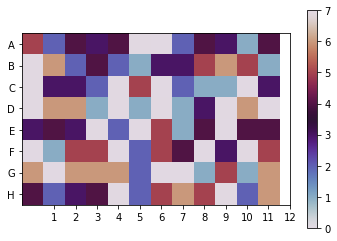

In [142]:
import re

def drawPlate(wellDict):
    plate = np.zeros((8,12))
    letterIdxDict = dict(zip('ABCDEFGH', range(8)))
    for i in wellDict:
        letter = re.findall('\D', i)[0]
        letterIdx = letterIdxDict[letter]
        number = int(re.findall('\d+', i)[0]) - 1 # zero indexing
        plate[letterIdx, number] = wellDict[i]
    return plate

meltedWellAssignments = well_assignments.melt()

welldict = {i:j for i,j in zip(meltedWellAssignments['value'], meltedWellAssignments['variable'])}

plate = drawPlate(welldict)

plt.set_cmap('twilight')
plt.imshow(plate)
plt.yticks(range(8), list('ABCDEFGH'))
plt.xticks(range(1,13))
plt.colorbar()
plt.show()

### 3.1 what a mess
I've made a plot of all of the traces. To untangle them, we'll need to recover the well assignments - so we can match up a media recipe with a well. We'll also need to calculate the growth rate for each and adjust for the fact that they all start with a fairly high OD.

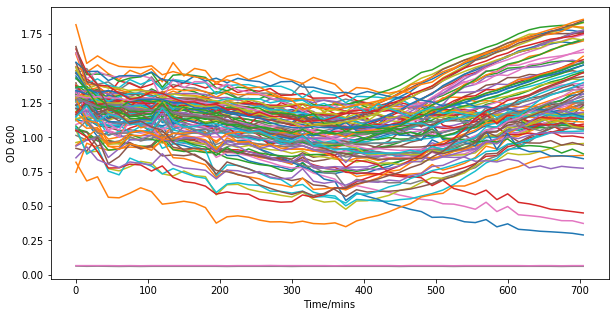

In [143]:
screen = DesignOfExpAnswers.clean_data('20201001-ecoli-media-screening.csv')
screen.columns = DesignOfExpAnswers.process_time_headers(screen.columns)
DesignOfExpAnswers.quick_plot(screen)

## matching well assignments 

The index of the ```pd.DataFrame``` goes: ```Index(['A01', 'A02' ... 'H11', 'H12'],dtype='object', name=nan)```, d our well assignments go: ```['A1', 'A2', 'A3' ... 'H12']```, so to match them up, we'll need to do some moves

In [145]:
def fn(ID):
    letter = ID[0]
    number= int(ID[1:])
    return letter + str(number)

new_idx = [fn(i) for i in screen.index]

In [146]:
screen.index = new_idx

In [147]:
well_assignments[str(0)]

0      A7
1     C11
2      C7
3     D12
4     E10
5      E6
6      F1
7      F5
8      F9
9      G2
10     G7
11     G8
Name: 0, dtype: object

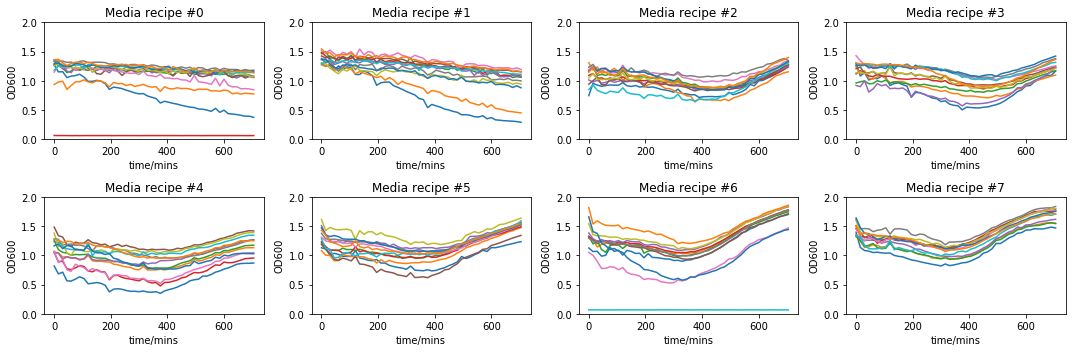

In [148]:
fig, ax = plt.subplots(2,4, figsize = (15,5))
for i,j in zip(well_assignments, ax.flatten()):
    group = screen.loc[well_assignments[i],:]
    for k in group.index:
        j.plot(screen.columns, group.loc[k,:])
        j.set_title('Media recipe #' + i)
        j.set_xlabel('time/mins')
        j.set_ylabel('OD600')
        j.set_ylim(0,2)
        #j.legend(group.index)
plt.tight_layout()
plt.show()

# I'm going to try cutting off the first 300 minutes

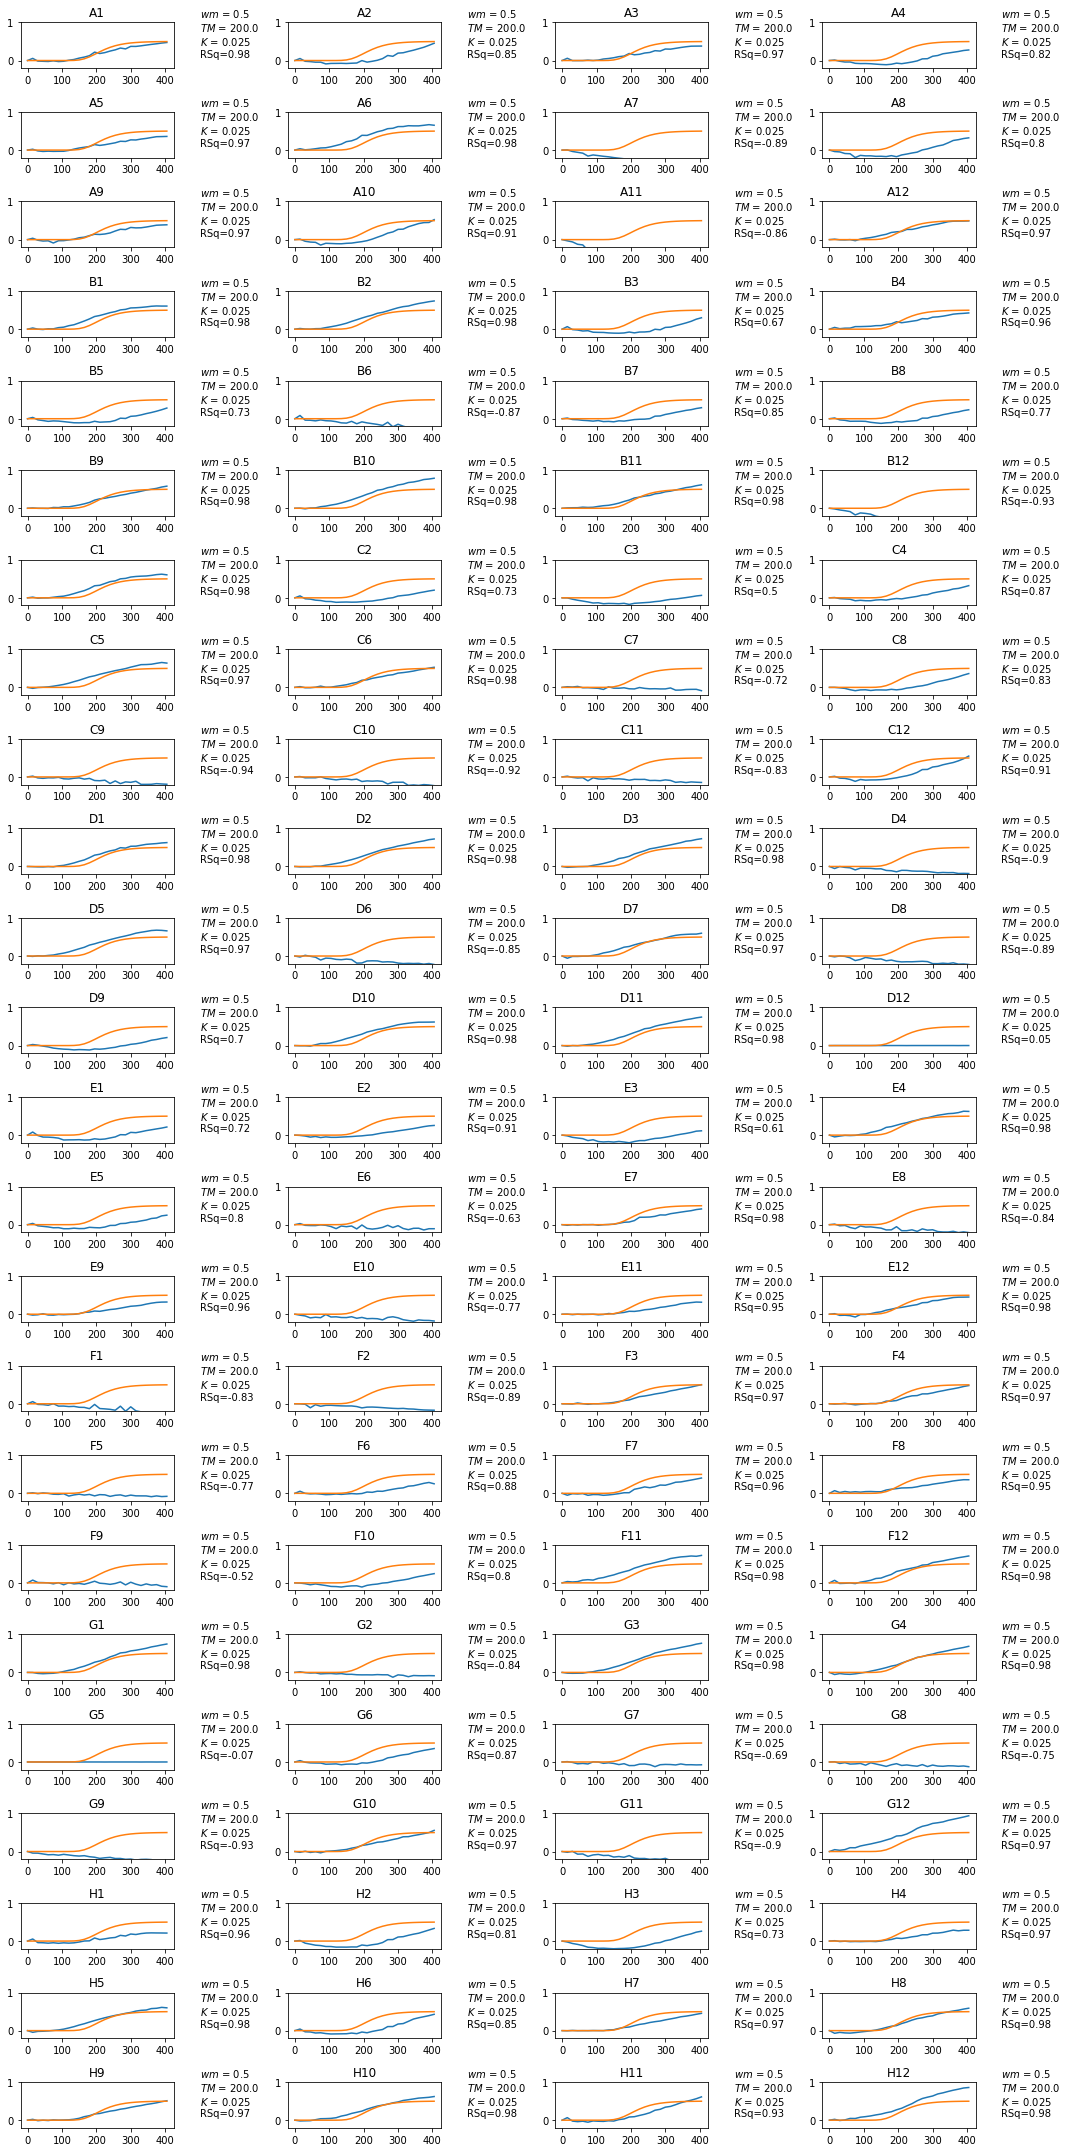

In [149]:
from scipy.stats import pearsonr

screenTrimmed = screen.loc[:,300:]
screenTrimmed = screenTrimmed.subtract(screenTrimmed.iloc[:,0], axis=0)
screenTrimmed.columns = [i - min(screenTrimmed.columns) for i in screenTrimmed.columns]

newBounds = ((0.,0,0.),(1., 400,0.05)) #wm,tm,k

fig,ax = plt.subplots(24,4, figsize = (15,30))


output = {}

for row,subplot in zip(screenTrimmed.index, ax.flatten()):
    parameters, covariance_matrix = curve_fit(DesignOfExpAnswers.gomperz_ans, 
                                              screenTrimmed.loc[row,:], 
                                              screenTrimmed.columns, 
                                              bounds=newBounds)
    wm,tm,k = parameters
    
    Y_pred = DesignOfExpAnswers.gomperz_ans(wm,tm,k,screenTrimmed.columns)
    rSq = pearsonr(Y_pred, screenTrimmed.loc[row,:])[0] 
    # pearsonr:
    # returns:  r : float    Pearson's correlation coefficient.
    # p-value : float  Two-tailed p-value.
    output[row] = {'wm':wm,'tm':tm,'k':k, 'r':rSq}
    
    timepoints = screenTrimmed.columns
    subplot.plot(timepoints, screenTrimmed.loc[row,:])
    subplot.plot(timepoints, Y_pred)
    subplot.set_title(row)
    subplot.set_ylim(-0.2,1)
    subplot.text(500,0.1,f'$wm$ = {round(wm,2)}\n$TM$ = {round(tm,2)}\n$K$ = {round(k,6)}\nRSq={round(rSq, 2)}')

plt.tight_layout()
plt.show()

# match up well assignments to growth-rate calculations

In [150]:
screeningResults = pd.DataFrame(output).T
screeningResults.head()

,wm,tm,k,r
A1,0.5,200.0,0.025,0.978533
A2,0.5,200.0,0.025,0.851166
A3,0.5,200.0,0.025,0.968525
A4,0.5,200.0,0.025,0.815139
A5,0.5,200.0,0.025,0.969149


In [151]:
resultsSummary = {}

for media in well_assignments:
    assigned_wells = well_assignments[media]
    resultsSummary[media] = screeningResults.loc[assigned_wells,:]
    
resultsSummary['1']

,wm,tm,k,r
A11,0.5,200.0,0.025,-0.860207
B12,0.5,200.0,0.025,-0.931373
B6,0.5,200.0,0.025,-0.865566
C10,0.5,200.0,0.025,-0.921707
C9,0.5,200.0,0.025,-0.937377
D4,0.5,200.0,0.025,-0.897215
D6,0.5,200.0,0.025,-0.848687
D8,0.5,200.0,0.025,-0.889846
E8,0.5,200.0,0.025,-0.842524
F2,0.5,200.0,0.025,-0.885974


In [156]:
growthRates = {}
for i in resultsSummary:
    print(f"media: {i} \t rsq.mean = {round(resultsSummary[i]['r'].mean(), 3)} \
    k.mean = {round(resultsSummary[i]['k'].mean(), 6)}")
    
    growthRates[i] = resultsSummary[i]['k'].mean()
    

media: 0 	 rsq.mean = -0.683     k.mean = 0.025
media: 1 	 rsq.mean = -0.892     k.mean = 0.025
media: 2 	 rsq.mean = 0.825     k.mean = 0.025
media: 3 	 rsq.mean = 0.753     k.mean = 0.025
media: 4 	 rsq.mean = 0.96     k.mean = 0.025
media: 5 	 rsq.mean = 0.972     k.mean = 0.025
media: 6 	 rsq.mean = 0.892     k.mean = 0.025
media: 7 	 rsq.mean = 0.977     k.mean = 0.025


In [157]:
growthRates # experimental values

{'0': 0.024999999999999998,
 '1': 0.024999999999999998,
 '2': 0.024999999999999998,
 '3': 0.024999999999999998,
 '4': 0.024999999999999998,
 '5': 0.024999999999999998,
 '6': 0.024999999999999998,
 '7': 0.024999999999999998}

In [158]:
mediaRecipes# input factors

,tryptone %w/v,yeast extract %w/v,glycerol %v/v,NaCl mM,glucose mM
0,0,0.0,0.0,12,10
1,0,0.0,0.4,12,0
2,0,0.5,0.0,0,10
3,0,0.5,0.4,0,0
4,2,0.0,0.0,0,0
5,2,0.0,0.4,0,10
6,2,0.5,0.0,12,0
7,2,0.5,0.4,12,10


In [168]:
from sklearn.linear_model import Perceptron
mlr = Perceptron()
mlr.fit(mediaRecipes, list(growthRates))



'perceptron'

In [166]:
np.array(list(growthRates.values()))

array([0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025])